_______
_______


# <center>Chapter 7: Partial Derivatives <br><sup><sup><br><br>
_______
_______

In [1]:
import numpy as np
import pandas as pd
import math as m
import matplotlib
import statistics as stats
import scipy.stats as scistats
import matplotlib.pyplot as plt
import matplotlib.colors as color
import os
import sys
import math
import netCDF4 as nc
import statsmodels.api as sm
import shapely
import statistics
import warnings
warnings.filterwarnings("ignore")

from sympy import symbols, diff
from scipy.optimize import fsolve
from matplotlib import cm as cm1
from scipy import optimize as opt
from pandas import read_table
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.patches import Polygon
from scipy.ndimage import gaussian_filter
from sklearn.linear_model import LinearRegression

/Users/kaeliaokamura/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
/Users/kaeliaokamura/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,


In [2]:
# Style Dictionary to standarize plotting scheme 
# between different python scripts 
styledict = {'xtick.labelsize':21,
             'xtick.major.size':9,
             'xtick.major.width':1,
             'ytick.labelsize':21,
             'ytick.major.size':9,
             'ytick.major.width':1,
             'legend.framealpha':0.0,
             'legend.fontsize':15,
             'axes.labelsize':22,
             'axes.titlesize':22,
             'axes.linewidth':2,
             'figure.figsize':(12,8),
             'savefig.format':'jpg'}
plt.rcParams.update(**styledict)

## Calculate partial derivatives

In [4]:
# define variables
x, y = symbols('x y', real=True)
# define function
z = 3 - x**2 - 2*y**2

# differentiate function z with respect to variable x
print(diff(z, x))

# differentiate function z with respect to variable x
print(diff(z, y))

-2*x
-4*y


## Figure 7.2: Surface and contours of z = f(x,y)

$\color{red}{\text{Figure 7.2(a) is correct but looks weird- any suggestions on how to fix it?}}$

In [5]:
# 7.2(a)

# sequence of 51 evenly spaced values from [-1,1]
x = y = np.linspace(-1,1,51)

# define function z
def z(x, y):
    return(3 - x**2 - 2*y**2)

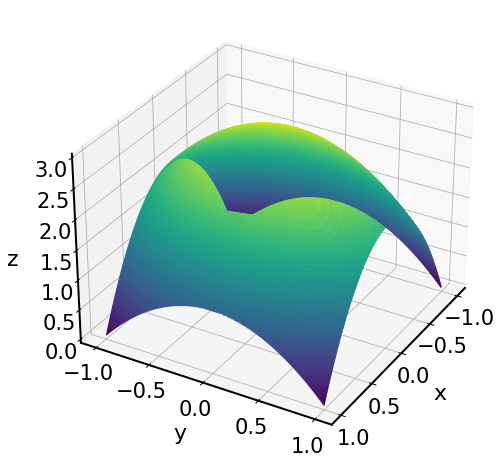

In [6]:
# plot
X, Y = np.meshgrid(x, y)
Z = z(X,Y)

fig = plt.figure(figsize = (8,24))
ax = plt.axes(projection='3d')
ax.contour3D(X, Y, Z.T, 300, cmap='viridis', edgecolor='none')
ax.set_xlabel('x', labelpad = 15)
ax.set_ylabel('y', labelpad = 15)
ax.set_zlabel('z', labelpad = 15)

ax.view_init(30, 30)
plt.show()

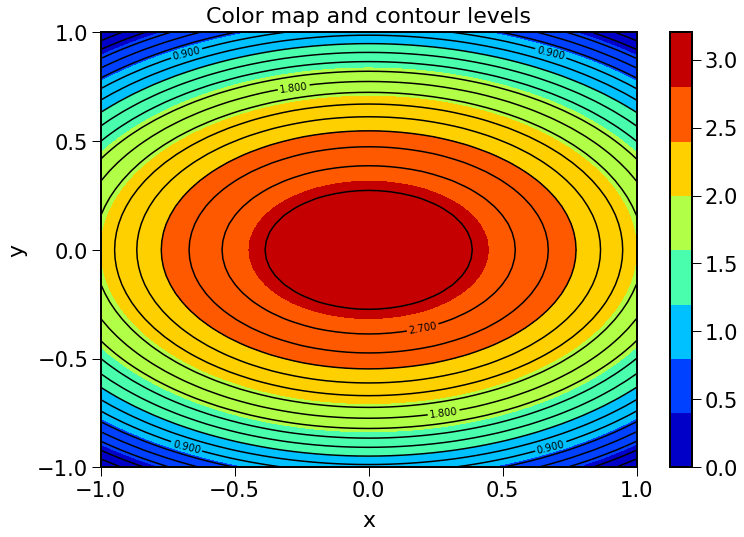

In [7]:
# 7.2(b)

# fig,ax = plt.subplots()
# cs = ax.contour(X, Y, Z, levels=20, cmap='jet')
# ax.clabel(cs,cs.levels[::5],fontsize = 15)

CS = plt.contour(X, Y, Z, levels=20, colors='k')
CS2 = plt.contourf(X, Y, Z, cmap='jet')
plt.clabel(CS,CS.levels[::6], fontsize=10,colors='k')
plt.colorbar(ticks=[0,0.5,1, 1.5,2, 2.5,3])


plt.title("Color map and contour levels", pad = 10)
plt.xlabel("x", labelpad = 10)
plt.xticks([-1,-0.5,0,0.5,1])
plt.ylabel("y", labelpad = 10)
plt.yticks([-1,-0.5,0,0.5,1])

plt.show()

## Solution of a nonlinear equation: fsolve()

In [8]:
# define function
def ft(t):
    return(np.cos(t) + 2*np.sin(t) + 0.06)

# find root with x0=0
root1 = fsolve(ft,0)
print(root1)

# convert radians to degrees
print(root1*180/np.pi)

# find cos of root
print(np.cos(root1))

# find sin of root
print(np.sin(root1))

[-0.49048365]
[-28.10264282]
[0.88210514]
[-0.47105257]


In [9]:
# find root with x0=3
root2 = fsolve(ft,3)
print(root2)

# convert radians to degrees
print(root2*180/np.pi)

# find cos of root
print(np.cos(root2))

# find sin of root
print(np.sin(root2))

[2.70478108]
[154.97254047]
[-0.90610514]
[0.42305257]


In [10]:
# define new function
def ft2(t):
    return(np.cos(t) + 2*np.sin(t) - 0.06)

# find root with x0=0
root1 = fsolve(ft2,0)
print(root1)

# convert radians to degrees
print(root1*180/np.pi)

# find cos of root
print(np.cos(root1))

# find sin of root
print(np.sin(root1))

[-0.43681157]
[-25.02745953]
[0.90610514]
[-0.42305257]


In [11]:
# find root with x0=3
root2 = fsolve(ft2,3)
print(root2)

# convert radians to degrees
print(root2*180/np.pi)

# find cos of root
print(np.cos(root2))

# find sin of root
print(np.sin(root2))

[2.65110901]
[151.89735718]
[-0.88210514]
[0.47105257]


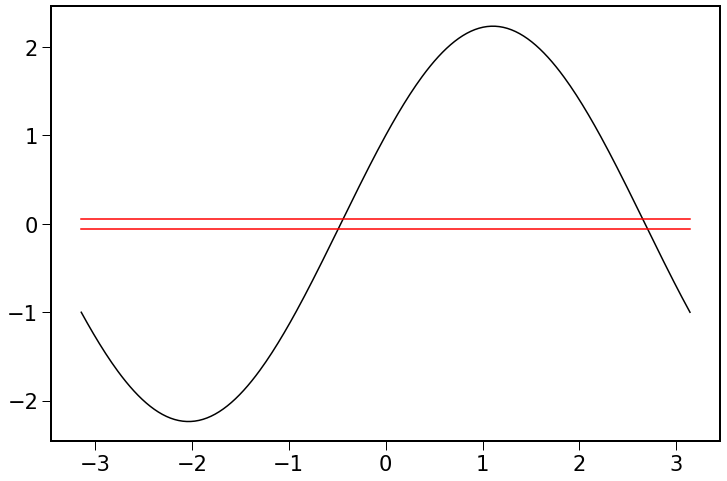

In [12]:
# graphic solutions of a nonlinear equation

# define function
def g(t):
    return(np.cos(t) + 2*np.sin(t))

t = np.linspace(-np.pi,np.pi, 301)
y1 = np.repeat(-0.06, len(t))
y2 = np.repeat(0.06, len(t))

plt.plot(t,g(t), 'k')
plt.plot(t,y1, 'r')
plt.plot(t,y2,'r')
plt.show()

## Figure 7.3: Contours and directions

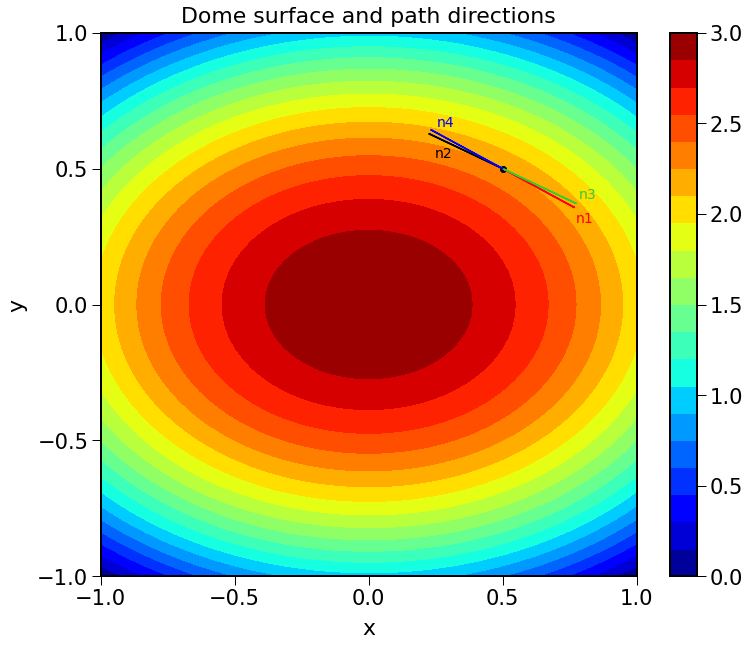

In [29]:
# sequence of 51 evenly spaced values from [-1,1]
x = y = np.linspace(-1,1,51)

# define function z
def z(x, y):
    return(3 - x**2 - 2*y**2)

# prepare variables for contour plot
X, Y = np.meshgrid(x, y)
Z = z(X,Y)

plt.figure(figsize = (12,10))
plt.contourf(X, Y, Z, levels=20, cmap='jet')
plt.colorbar(ticks=[0,0.5,1, 1.5,2, 2.5,3])

plt.title("Dome surface and path directions", pad = 10)
plt.xlabel("x", labelpad = 10)
plt.xticks([-1,-0.5,0,0.5,1])
plt.ylabel("y", labelpad = 10)
plt.yticks([-1,-0.5,0,0.5,1])

# add point and arrows
plt.scatter(0.5,0.5, color = 'k')

# n1
plt.arrow(0.5,0.5,0.8821*0.3,-0.4711*0.3, color = 'r', linewidth = 1.5)
plt.text(0.5+0.9061*0.3,0.43-0.4231*0.3, "n1", size = 14, color = 'r')

# n2
plt.arrow(0.5,0.5,-0.90611*0.3,0.4231*0.3, linewidth = 1.5)
plt.text(0.52-0.90611*0.3,0.415+0.4231*0.3, "n2", size = 14)

# n3
plt.arrow(0.5,0.5,0.9061*0.3,-0.4231*0.3, color = 'limegreen', linewidth = 1.5)
plt.text(0.52+0.8821*0.3,0.53-0.4711*0.3, "n3", size = 14, color = 'limegreen')


# n4
plt.arrow(0.5,0.5,-0.8821*0.3,0.4711*0.3, color = 'b', linewidth = 1.5)
plt.text(0.52-0.8821*0.3,0.515+0.4711*0.3, "n4", size = 14, color = 'b')

plt.show()

## Figure 7.4: Traveling wave w = f(x-ct)

In [14]:
# 7.4(a)
x = np.linspace(0,10,101)
t = np.linspace(0,2,101)

# define function z
def w(x, t):
    return(0.3*np.sin(x - 10*t))

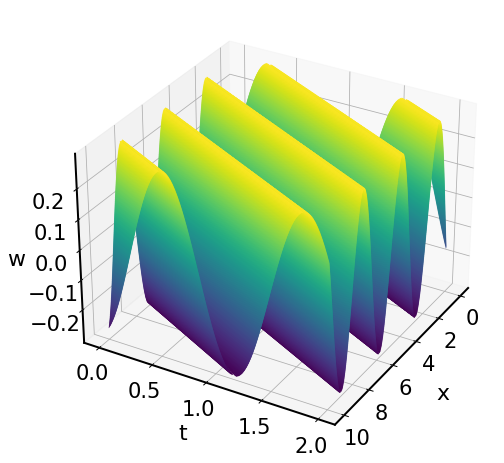

In [15]:
# plot
X, T = np.meshgrid(x, t)
W = w(X,T)

fig = plt.figure(figsize = (8,24))
ax = plt.axes(projection='3d')
ax.contour3D(X, T, W.T, 300, cmap='viridis', edgecolor='none')
ax.set_xlabel('x', labelpad = 15)
ax.set_ylabel('t', labelpad = 15)
ax.set_zlabel('w', labelpad = 15)
ax.tick_params(axis='z', which='major', pad=8)

# change view
ax.view_init(30, 30)

plt.show()

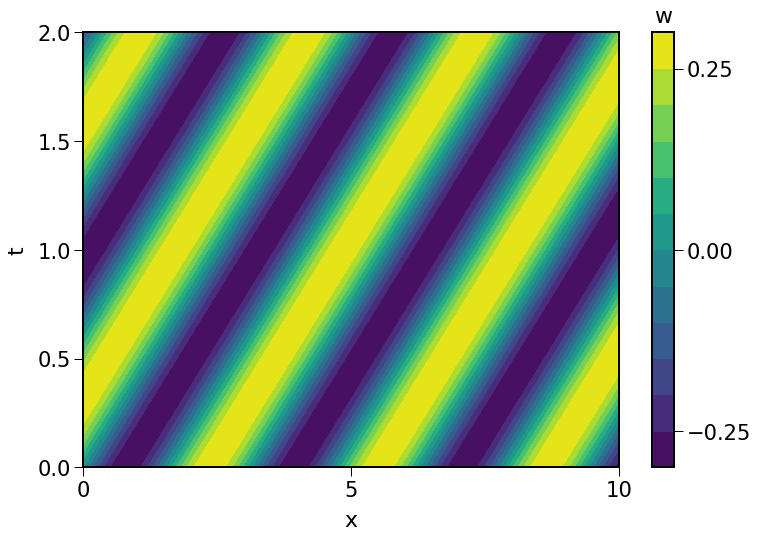

In [16]:
# 7.4(b)

# plot contour map
plt.contourf(X, T, W.T, cmap='viridis',levels=13)
# add colorbar
clb = plt.colorbar(ticks=[-0.25,0,0.25])
clb.ax.set_title('w', pad = 10)

# add labels
plt.xlabel("x", labelpad = 10)
plt.xticks([0,5,10])
plt.ylabel("t", labelpad = 10)
plt.yticks([0,0.5,1,1.5,2])

plt.show()

## Figure 7.5: Heat diffusion

In [17]:
# 7.5(a)
D = 111
x = np.linspace(-8,8,200)
t = np.linspace(0.01,1,200)

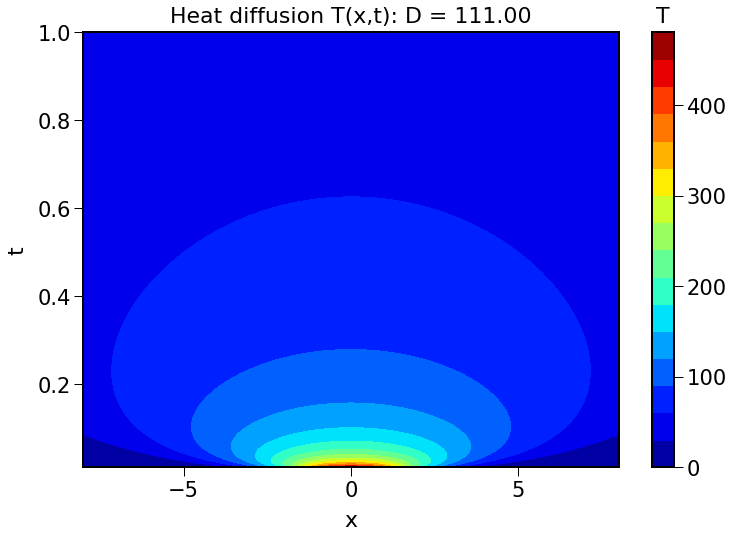

In [18]:
def Temp(x,t):
    return(500*(D*t)**(-1/2)*math.e**((-x**2/(4*D*t))))

# plot
X, T = np.meshgrid(x, t)
Temp = Temp(X,T)

plt.contourf(X, T, Temp, cmap='jet',levels = 15)
# add colorbar
clb = plt.colorbar(ticks=[0,100,200,300,400])
clb.ax.set_title('T', pad = 10)

# add labels
plt.title("Heat diffusion T(x,t): D = 111.00", pad = 10)
plt.xlabel("x", labelpad = 10)
plt.xticks([-5,0,5])
plt.ylabel("t", labelpad = 10)
plt.yticks([0.2,0.4,0.6,0.8,1])

plt.show()

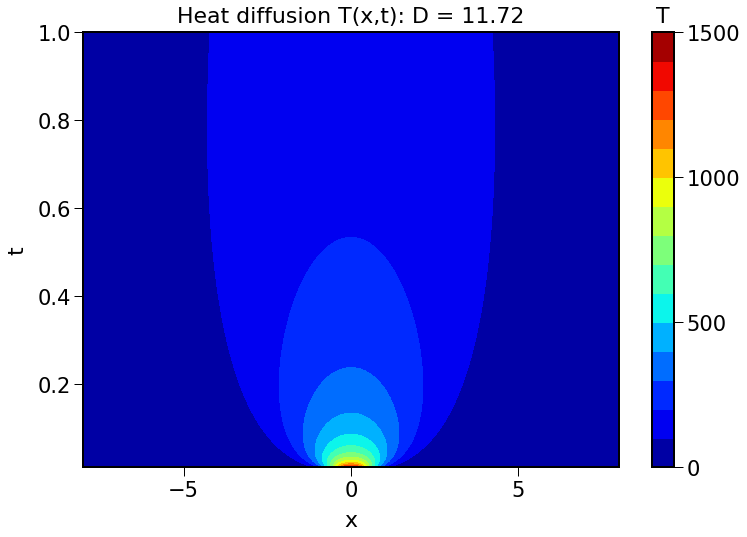

In [19]:
# 7.5(b)
D = 11.72

def Temp(x,t):
    return(500*(D*t)**(-1/2)*math.e**((-x**2/(4*D*t))))

# plot
X, T = np.meshgrid(x, t)
Temp = Temp(X,T)

plt.contourf(X, T, Temp, cmap='jet', levels=15)
# add colorbar
clb = plt.colorbar(ticks=[0,500,1000,1500])
clb.ax.set_title('T', pad = 10)

# add labels
plt.title("Heat diffusion T(x,t): D = 11.72", pad = 10)
plt.xlabel("x", labelpad = 10)
plt.xticks([-5,0,5])
plt.ylabel("t", labelpad = 10)
plt.yticks([0.2,0.4,0.6,0.8,1])

plt.show()

## Earth's gravitational acceleration

In [20]:
G = 6.67430 * 10**(-11)
M = 5.972 * 10**(24)
r = 6371 * 10**(3)
-G*M/r**2

-9.819973426224687

## Figure 7.8: Source and Sink Fields

In [21]:
# 7.8(a)

# define variables
m = 4
n = 20
r = [0.2,0.4,0.8,1.5]
x = np.zeros(n)
y = np.zeros(n)
xa = np.zeros(n)
ya = np.zeros(n)
th = np.zeros(n)

# calculate values
for j in range(m):
    for i in range(n):
        th[i] = (i+1)*2*np.pi/n + j*np.pi/n
        x[i] = r[j]*np.cos(th[i])
        y[i] = r[j]*np.sin(th[i])
        xa[i] = x[i]
        ya[i] = y[i]

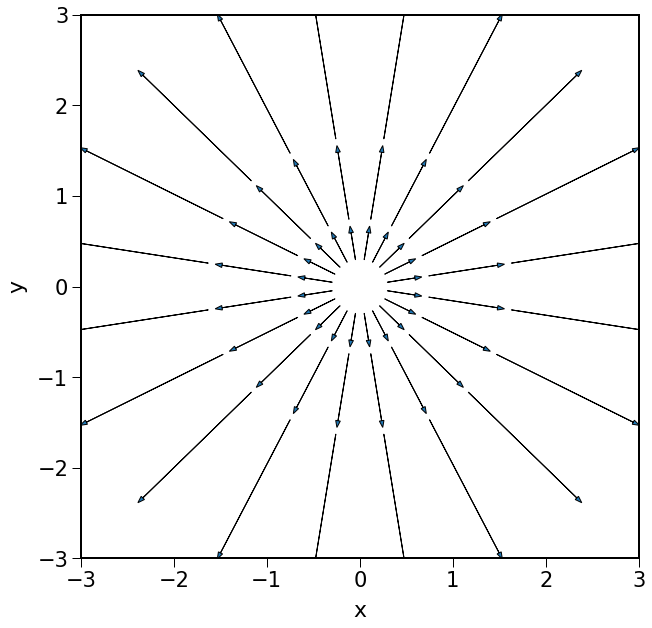

In [22]:
# set up plot
plt.figure(figsize = (10,10))
plt.plot()
plt.xlim(-3,3)
plt.ylim(-3,3)

# plot arrows
for a in range(20):
    plt.arrow(x[a]*0.2,y[a]*0.2,xa[a]*0.2,ya[a]*0.2, head_width =0.05)
    plt.arrow(x[a]*0.5,y[a]*0.5,xa[a]*0.5,ya[a]*0.5, head_width =0.05)
    plt.arrow(x[a]*1.1,y[a]*1.1,xa[a]*1.1,ya[a]*1.1, head_width =0.05)
    
# add labels
plt.xlabel("x", labelpad = 10)
plt.ylabel("y", labelpad = 10)
plt.show()

In [23]:
# 7.8(b)

# define variables
m = 4
n = 20
r = [0.4,0.9,1.6,3.0]
x = np.zeros(n)
y = np.zeros(n)
xa = np.zeros(n)
ya = np.zeros(n)
th = np.zeros(n)

# calculate values
for j in range(m):
    for i in range(n):
        th[i] = (i+1)*2*np.pi/n + j*np.pi/n
        x[i] = r[j]*np.cos(th[i])
        y[i] = r[j]*np.sin(th[i])
        xa[i] = - x[i]/2
        ya[i] = - y[i]/2

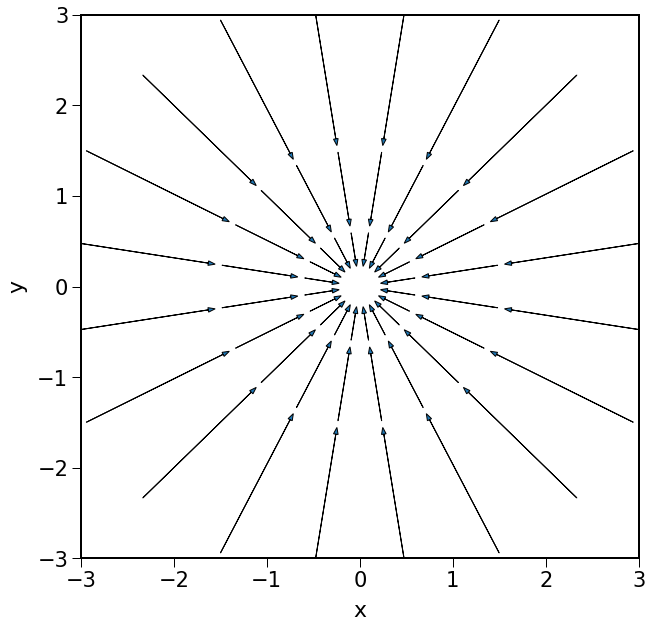

In [24]:
# set up plot
plt.figure(figsize = (10,10))
plt.plot()
plt.xlim(-3,3)
plt.ylim(-3,3)

# plot arrows
for a in range(20):
    plt.arrow(x[a]*0.2,y[a]*0.2,xa[a]*0.2,ya[a]*0.2, head_width =0.05)
    plt.arrow(x[a]*0.5,y[a]*0.5,xa[a]*0.5,ya[a]*0.5, head_width =0.05)
    plt.arrow(x[a]*1.1,y[a]*1.1,xa[a]*1.1,ya[a]*1.1, head_width =0.05)

# add labels
plt.xlabel("x", labelpad = 10)
plt.ylabel("y", labelpad = 10)
plt.show()

## 7.9: Positive and negative vortexes

In [25]:
# 7.9(a)

# define variables
m = 5
n = 20
r = [0.5,0.9,1.3,1.7,2.1]
x = np.zeros(n)
y = np.zeros(n)
xa = np.zeros(n)
ya = np.zeros(n)
th = np.zeros(n)

# calculate values
for j in range(m):
    for i in range(n):
        th[i] = (i+1)*2*np.pi/n + j*np.pi/n
        x[i] = r[j]*np.cos(th[i])
        y[i] = r[j]*np.sin(th[i])
        xa[i] = - y[i]
        ya[i] = x[i]

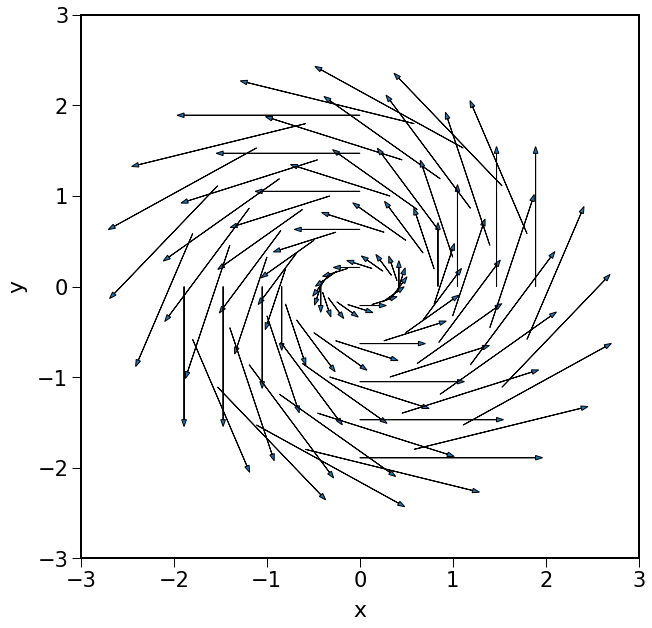

In [26]:
# set up plot
plt.figure(figsize = (10,10))
plt.plot()
plt.xlim(-3,3)
plt.ylim(-3,3)

# plot arrows
for a in range(20):
    plt.arrow(x[a]*0.2,y[a]*0.1,xa[a]*0.1,ya[a]*0.1, head_width =0.05)
    plt.arrow(x[a]*0.4,y[a]*0.3,xa[a]*0.3,ya[a]*0.3, head_width =0.05)
    plt.arrow(x[a]*0.5,y[a]*0.5,xa[a]*0.5,ya[a]*0.5, head_width =0.05)
    plt.arrow(x[a]*0.7,y[a]*0.7,xa[a]*0.7,ya[a]*0.7, head_width =0.05)
    plt.arrow(x[a]*0.9,y[a]*0.9,xa[a]*0.9,ya[a]*0.7, head_width =0.05)


# add labels
plt.xlabel("x", labelpad = 10)
plt.ylabel("y", labelpad = 10)
plt.show()

In [27]:
# 7.9(b)

# define variables
m = 5
n = 20
r = [0.5,0.9,1.3,1.7,2.1]
x = np.zeros(n)
y = np.zeros(n)
xa = np.zeros(n)
ya = np.zeros(n)
th = np.zeros(n)

# calculate values
for j in range(m):
    for i in range(n):
        th[i] = (i+1)*2*np.pi/n + j*np.pi/n
        x[i] = r[j]*np.cos(th[i])
        y[i] = r[j]*np.sin(th[i])
        xa[i] = y[i]
        ya[i] = -x[i]

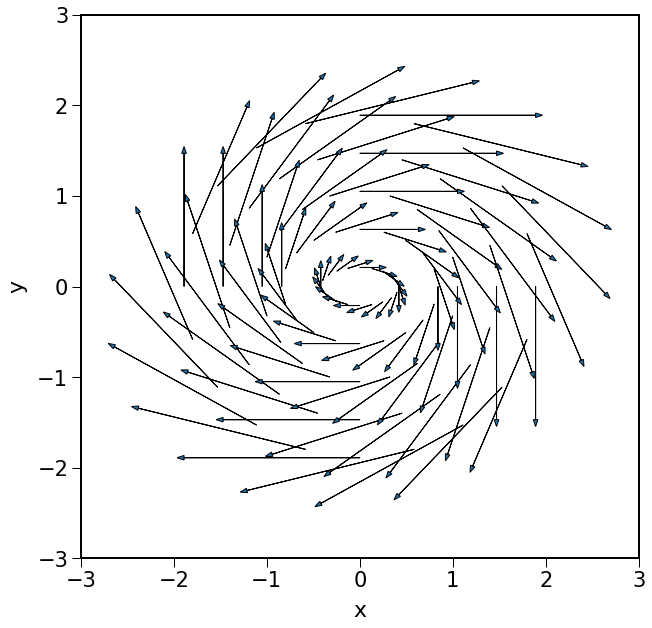

In [28]:
# set up plot
plt.figure(figsize = (10,10))
plt.plot()
plt.xlim(-3,3)
plt.ylim(-3,3)

# plot arrows
for a in range(20):
    plt.arrow(x[a]*0.2,y[a]*0.1,xa[a]*0.1,ya[a]*0.1, head_width =0.05)
    plt.arrow(x[a]*0.4,y[a]*0.3,xa[a]*0.3,ya[a]*0.3, head_width =0.05)
    plt.arrow(x[a]*0.5,y[a]*0.5,xa[a]*0.5,ya[a]*0.5, head_width =0.05)
    plt.arrow(x[a]*0.7,y[a]*0.7,xa[a]*0.7,ya[a]*0.7, head_width =0.05)
    plt.arrow(x[a]*0.9,y[a]*0.9,xa[a]*0.9,ya[a]*0.7, head_width =0.05)


# add labels
plt.xlabel("x", labelpad = 10)
plt.ylabel("y", labelpad = 10)
plt.show()